  # SPA FINAL PROJECT: KEPLERS EQUATION AND RADIAL VELOCITY 

  Bogdan Stamenov, ID:190332475, Introduction to Scientific Computing Report, Expt. 10.05.2021 School of Physics and Astronomy, Queen Mary University of London, Mile End Road, London, E14NS 

                                                                ### Introduction

The Radial Velocity Method is responsible for the first detections of exoplanets and has taken credit for the detection of hundreds of more exoplanets outside of our solar system, when first in 1992 with this method the first exoplanet was located. Here in this paper we have used and discovered numerical methods and have used programming to physically make sense of what is plotted and compare it to actual real-life graphs and examples used and calculated by way more sophisticated machines.
In this topic we will discover how to use Kepler's equations and use programming methods such as Newton's method, and discover further topics such as finding the distance between the exoplanet and star which it is orbiting.

By initially taking into account Kepler's equation for eccentric anomaly: $$ E - e sin(E) = \frac{2 \pi t}{P} $$

For orbital fitting of planets,
satellites and stars, one needs to make a code to predict the position and velocity of the object orbiting. The
most common procedure consists on first solving the so-called “Kepler’s” equation for the eccentric anomaly, which is the equation above.

Then use the two expression from the definition of true anomaly [1]: $$ sin(f) = \frac{\sqrt{1-e^2} \sin(E)}{1-e \cos(E)} $$, and
                                                                                   $$ cos(f) = \frac{\cos(E)-e}{1-e \cos(E)} $$

to get values for different true anomalies. And finally we evaluate for each f(t), value of true anomaly, to get the radial velocity, 
 $$ RV = K \cos(f(t)+w) + e \sin(w) $$

where K stands for the radial velocity amplitude and w is called the radial velocity amplitude is the angular separation between the a reference point of the orbit
such as the crossing with the sky plane.

Further more we will discuss why the distance varies and why it corresponds with the graph of radial velocity and also evaluate the x and y cartesian coordinates with respect to the periapse and get a visualisation of what the orbit would look like when being viewed from a 90 degree angle.


### Methods and Calculations

The overall concept of the methods is root finding, and suggested by many sources, such as the paper by Carl D. Murray and Alexandre Correia, Keplerian Orbits and Dynamics of Exoplanets, The Newton-Raphson method for some iteration values, running from i=0,1,2.. etc. is the best method for this scenario. Also using several techniques for appending lists we can arrive at a pretty good visualisation of the radial velocity and orbit.

In [1]:
import numpy as np #simple import to use numpy when needed as np.(command)
from scipy.constants import G #importing the constant G (gravitational constant)
P = 17600  #period in days
def E(t): # function for the eccentric anomaly
    return iteration_values(g, gp, x0)[0] 
    '''Returns the function iteration values which uses the newton raphson method to get a value for the eccentric anomaly'''

In [2]:
def g(E):
    """This is Keplers equation, without a first derivative"""
    return (E - e*(np.sin(E)) - (2*(np.pi)*(t)/P))

In [3]:
def gp(E):
    return 1-e*(np.cos(E))
    """Keplers equation with first derivative"""

From Kepler's equation, the Newton-Raphson method needs the programmer to manually find the derivative of the function you are using, hence we make 2 functions for Kepler's equation and its derivative to take as parameters for the iterations values functions.

In [4]:
import math 
def f(t):
    return math.atan2(np.sqrt(1-e**2)*np.sin(E(t)), ((np.cos(E(t))-e)))
    """This function calculates the true anomaly, f(t) ,with respect to eccentric anomaly, E(t)"""
#     return math.atan2((np.cos(E(t))-e),np.sqrt(1-e**2)*np.sin(E(t)))

From the definition of the true anomaly, we have come to an expression for the true anomaly, hence the equation above. I used a function with the math.atan2 library function for this, which takes 2 parameters for x and y

In [5]:
a = 2.93 #measured in au
def distance_r(t):
    return ((a*(1-e**2))/(1+e*math.cos(f(t)+w)))
    """This function calculates the distance from the focus to the centre of the object in AU"""

This equation has been taken from a source, which I will discuss, and simply using the function of true anomaly inside cosine we can arrive at an equation for the distance from the centre of the star to the centre of the exoplanet, 14HER B

In [6]:
w = 12.3
K = 90
def RV(t):
    return (K*np.cos((f(t)+w)) + e*np.sin(w))
    """And this is used to calculate the radial velocity with respect to the true anomaly, f(t)"""

Simple function for the definition we got from the introduction, and again using the true anomaly inside cosine.

In [7]:
def x_value(t):
    return distance_r(t)*np.cos(f(t))
    """X values of the cartesian coordinate system"""

The cartesian coordinate for x is simply    $$ x = r \cos(f(t)) $$,
hence that is made into a function

In [8]:
def y_value(t):
    return distance_r(t)*np.sin(f(t))
    """Y values of the cartesian coordinate system"""

The same concept for the y-coordinate, $$ y =  r\sin(f(t)) $$
,hence again made into a simple function and calling our true anomaly function

In [9]:
Mpsini = 1500 #Earth masses
def Mass_of_star():
    return ((a**3/(P**2*G))*(4*(np.pi)**2))-Mpsini # Keplers Third Law
    """This function uses the reduced mass, MpSIN(i), to calculate the mass of the star it is orbiting"""
print(Mass_of_star(), 'Earth Masses')

46532.09599114108 Earth Masses


Kepler's Third Law used in this equation to get the mass of the star, which is calculated in terms of Earth Masses

In [10]:
Nitermax = 20     # maximum number of iterations
epsilon = 1e-8    # convergence parameter - the accuracy of the root
#We will use this in the iteration values function to set the number of iterations and the accuracy of the root

In [11]:
def newton_step(f, fp, x0):
    """Perform one step of the Newton-Raphson algorithm."""
    
    return x0 - ((f(x0))/fp(x0)) #Newton-Raphson method equation
    """ The Newton-Raphson method function, that we use for root finding """

The function above is the definition of the Newton-Raphson method: $$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.
$$, taking 3 parameters, a function and its derivative, and the initial x

In [12]:
def iteration_values(g, gp, x0):
    """Iteration values functions taking 2 parameters"""
    old_x = x0
    new_x = newton_step(g, gp, x0)
    count=0
    while abs(old_x - new_x) > epsilon and count <= Nitermax:
        """While loop used to give us the condition in which the Newton-Raphson method would iterate"""
        old_x=new_x
        new_x=newton_step(g, gp, new_x)
        count += 1
        #updating the old x with the new x and counting
    return new_x, count

Initially we would 'store' x0 inside old_x and set our new_x to the calculation of the Newton-Raphson method function and our count would start from 0(usually does not start from zero, it would start from 1 after the first calculation but the computer reads it that way). The while loop would prevents the code from iterating without end if it should fail or contain a mistake.  In this sense the stopping criteria are:

$$|x_{n+1} - x_{n}| < \epsilon $$
or 
the number of iterations exceeds some number `Nitermax`

### Graphs and Results

The code under presents us with the graphs and results which we will be the base of our discussion and the curves are what will be physically important in our arguments.

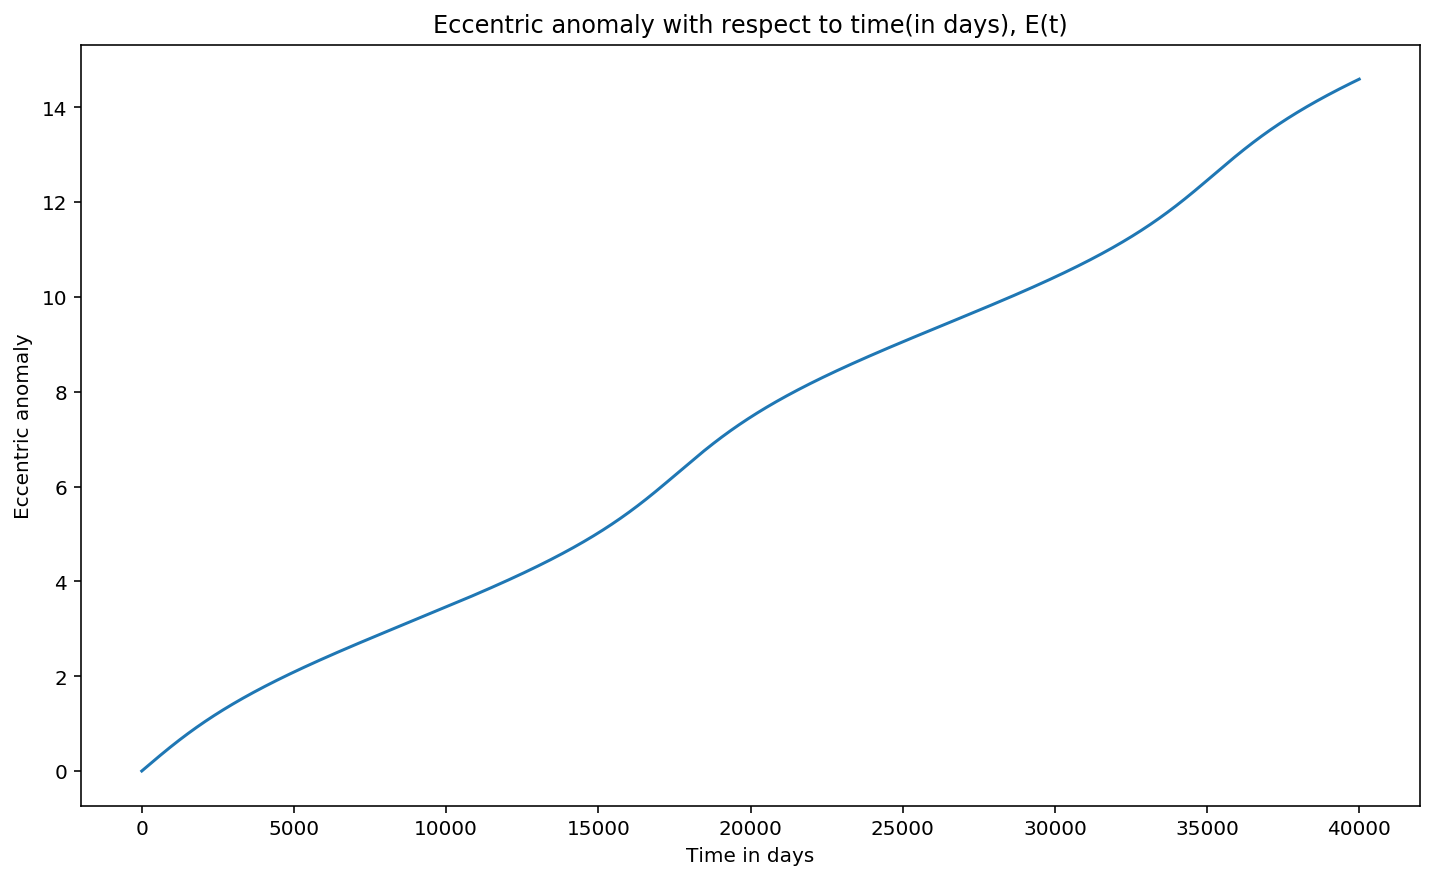

In [13]:
import matplotlib.pyplot as plt
all_values_of_true_anomaly = []
all_values_of_RV = []
all_values_of_distance_r = []
all_values_of_x_value = []
all_values_of_y_value = []
"""Stores all values of the calculations, this way it allows us to experiment for more than one eccentricity"""
for e in [0.349]:
    """for loop for the eccentricity, hence this is the part where it allows us to loop through more than once eccentricity"""
    x0 = 0
    ts = []#list from where to store the values of t,in days
    values_in_curve = []
    values_of_distance_r = []
    values_of_true_anomaly = []
    values_of_RV = []
    values_of_x_value = []
    values_of_y_value = []
    """This is where we store the appended values of each function which would produce the graphs"""
    for n in range(400000):
        """for loop for n, which gives is the lenght of the time in days in which the functions would be calculated through """
        t = 0.1*n
        ts.append(t)
        values_in_curve.append(E(t))
        x0 = values_in_curve[-1]#we write the -1 to start calculating from every last value,and not again from beginning
        values_of_true_anomaly.append(f(t))
        values_of_distance_r.append(distance_r(t))
        values_of_x_value.append(x_value(t))
        values_of_y_value.append(y_value(t))
        values_of_RV.append(RV(t))
        """and then we append the calculated functions for each point into the list  """
    all_values_of_distance_r.append(values_of_distance_r)
    all_values_of_true_anomaly.append(values_of_true_anomaly)
    all_values_of_RV.append(values_of_RV)
    all_values_of_x_value.append(values_of_x_value)
    all_values_of_y_value.append(values_of_y_value)#the simple append method, which allows us to store all our values in a list
    """and finaly append the lists into the all values lists, as I have mentioned before, in order to give the code the possibility to experiment with more than one eccentricity at the same time"""
    plt.plot(ts, values_in_curve)
    plt.title('Eccentric anomaly with respect to time(in days), E(t)')
    plt.xlabel('Time in days')
    plt.ylabel('Eccentric anomaly')

*Figure1: Eccentric anomaly, E(t) and how it varies in time in days*

Figure1 here depicts how the eccentric anomaly varies with time. It is through 40000 days, which is more than 2 periods of the exoplanet 14HerB around 14 Hercules.

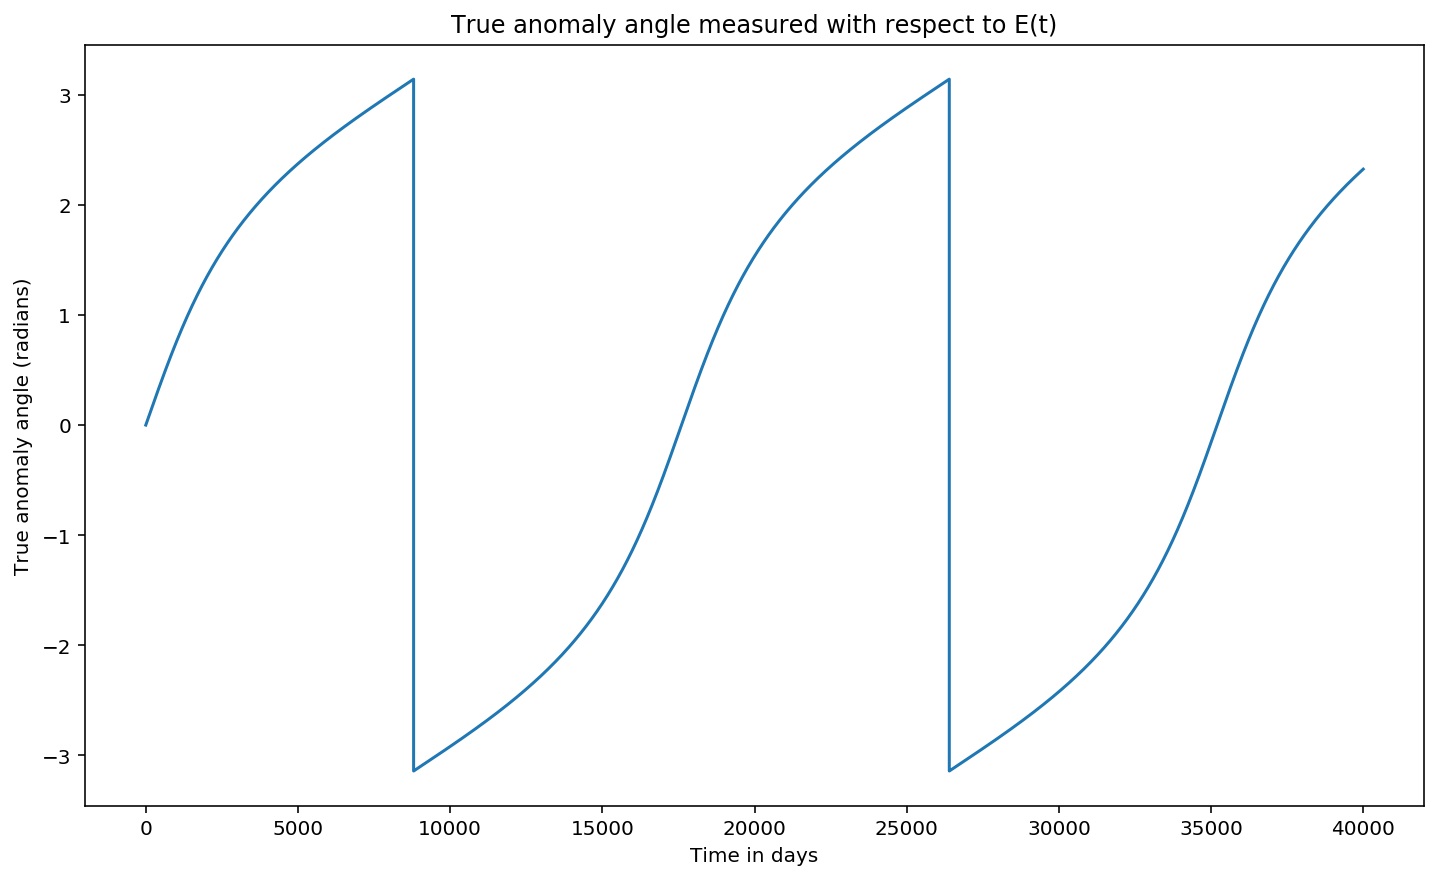

In [14]:
 for values_of_true_anomaly in all_values_of_true_anomaly:
    """for loop for to get all the values and print our list"""
    plt.plot(ts, values_of_true_anomaly)
    plt.title('True anomaly angle measured with respect to E(t)')
    plt.xlabel('Time in days')
    plt.ylabel('True anomaly angle (radians)')

*Figure2: True anomaly , f(t) with respect to time in days.*

True anomaly starts at the periapse and in the middle it is in the apoapse, which indicates several physical properties, which we will discuss further

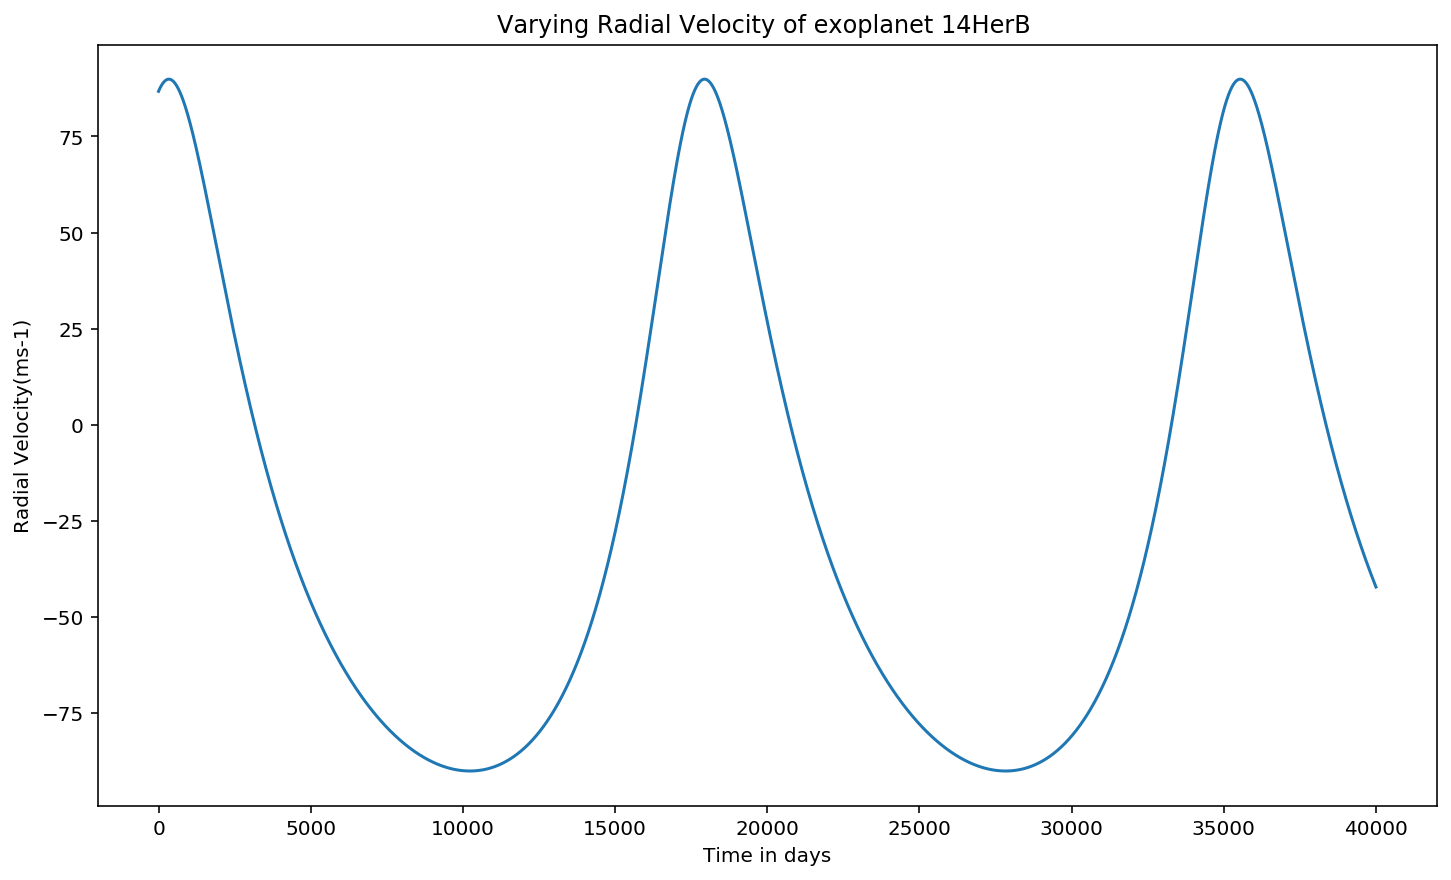

In [15]:
for values_of_RV in all_values_of_RV:
    """for loop for to get all the values and print our list"""
    plt.plot(ts, values_of_RV)
    plt.title('Varying Radial Velocity of exoplanet 14HerB ')
    plt.xlabel('Time in days')
    plt.ylabel('Radial Velocity(ms-1)')

*Figure3: Radial Velocity curve*

Radial velocity curve, which again is a physical indicator of how the system would behave

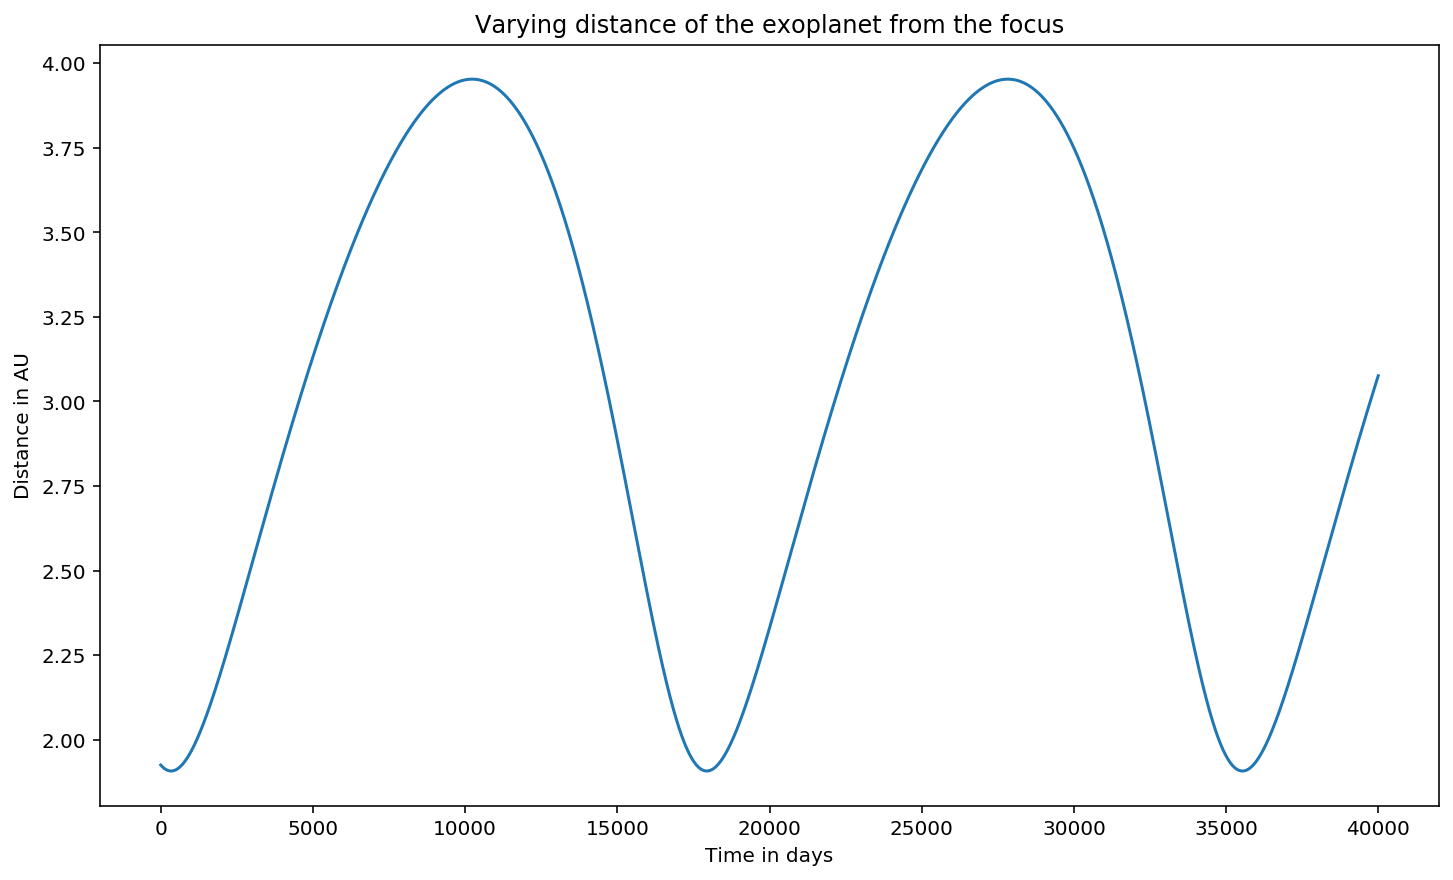

In [16]:
for values_of_distance_r in all_values_of_distance_r:
    """for loop for to get all the values and print our list"""
    plt.plot(ts, values_of_distance_r)
    plt.title('Varying distance of the exoplanet from the focus')
    plt.xlabel('Time in days')
    plt.ylabel('Distance in AU')

*Figure4: Distance curve of planet 14HerB*

In [17]:
# for values_of_x_value in all_values_of_x_value:
#     """for loop for to get all the values and print our list"""
#     plt.plot(ts, values_of_x_value)
#     plt.xlabel('Time in days')
#     plt.ylabel('X-coordinate with respect to time')

In [18]:
# for values_of_y_value in all_values_of_y_value:
#     """for loop for to get all the values and print our list"""
#     plt.plot(ts, values_of_y_value)
#     plt.xlabel('Time in days')
#     plt.ylabel('Y-coordinate with respect to time')

Text(0.5, 1.0, 'Visualisation of star 14Her at focus and orbiting planet 14HerB around it')

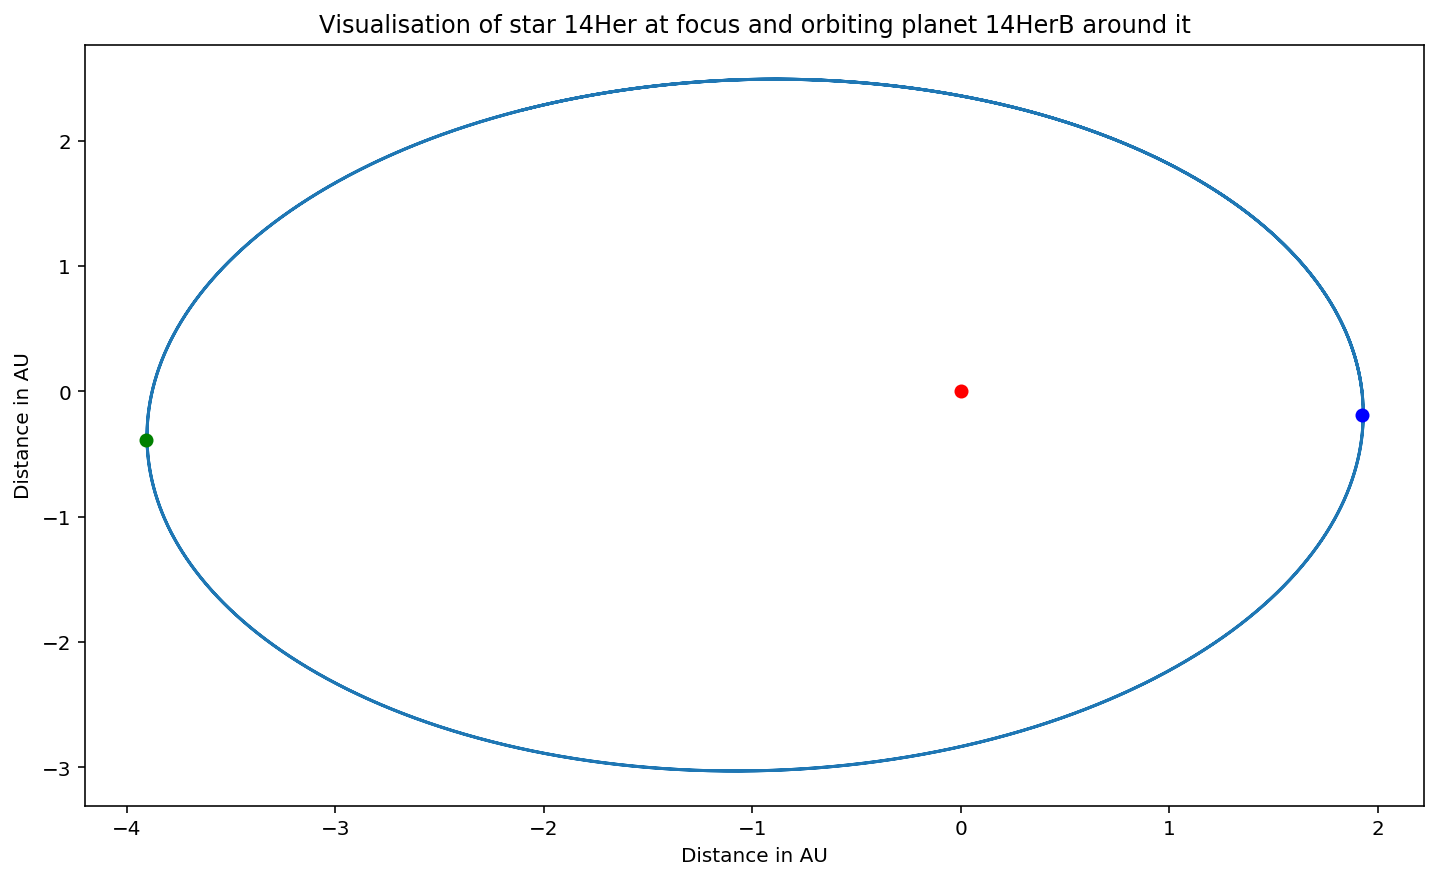

In [19]:
plt.plot(values_of_x_value, values_of_y_value)
plt.plot(0,0, 'ro', label = 'Star at focus')
plt.plot(1.925,-0.19, 'bo', label = 'perihilion')
plt.plot(-3.91,-0.39, 'go', label = 'aphelion')
plt.xlabel('Distance in AU')
plt.ylabel('Distance in AU')
plt.title('Visualisation of star 14Her at focus and orbiting planet 14HerB around it')
#Here I have used the cartesian coordinates of x and y to arrive at a visualisation of the orbit

*Figure5: Visualisation of the orbit of planet 14HerB*

From this visualisation you can clearly notice how the orbit behaves.

### Discussion

By just looking at the graphs, we can see that the actual curves match each other physically. But there are some limitations to the code and as each method would have its own pros and cons.

**The main question for our method is if the Newton-Raphson method is good enough. Firstly the advantage of the Newton-Raphson method is that it would converge quadratically, which means that the number of correct digits approximately *doubles* with each iterations,  which was proved analytically in the paper *Numerical Recipes* section 9.4, [6]and is considered a huge pros for our calculations. However unlike the Bisection algorithm, the Newton-Raphson method can be fooled by local extrema, which can send our next guess towards a very far point, e.g. infinity. There are two ways I have discovered in which you can address this. First one it is possible to make a hybrid step where the bisection algorithm would step in when the Newton-Raphson method would fail. To see how this works please refer to *rtsafe algorithm in Numerical recipes*. Another way to address is to actually consider by empirical means or analytical observation that there lies no local extrema for where we are looking for the root. Hence for a person who does not get it algorithm at first glance, it is that we use information about the derivative to get guide the choice of points which we will get out of this**

Going into the whole picture, I have chosen the exoplanet 14HerB [4], which sits in the Hercules constellation, to be my main example. In this paper We have the Radial velocity curve. Of course there would be many limitations to our code as mentioned above, but if you look closely into the *figure6*[4] which is a curve with 116 points which was calculated from ELODIE. BJD refers to Billion Julian days, and radial velocity is to the power of ^4. This graph may be confusing at first but firstly we, as the observer, looking at the orbiting exoplanet and the star its orbiting, we are actually observing their whole system, not just the planet, hence as an observer we are viewing it at the designated speed. Also mathematically between the peak and the lowest point of this curve, it can be determined that radial velocity is between approximately 150 ms-1. Which, if looking at our graph on figure *figure3* the graph oscillates between approximately 75 and -75, which has a combined difference of 150ms-1. So it looks like we have got a good base code which physically matches way more sophisticated machines.

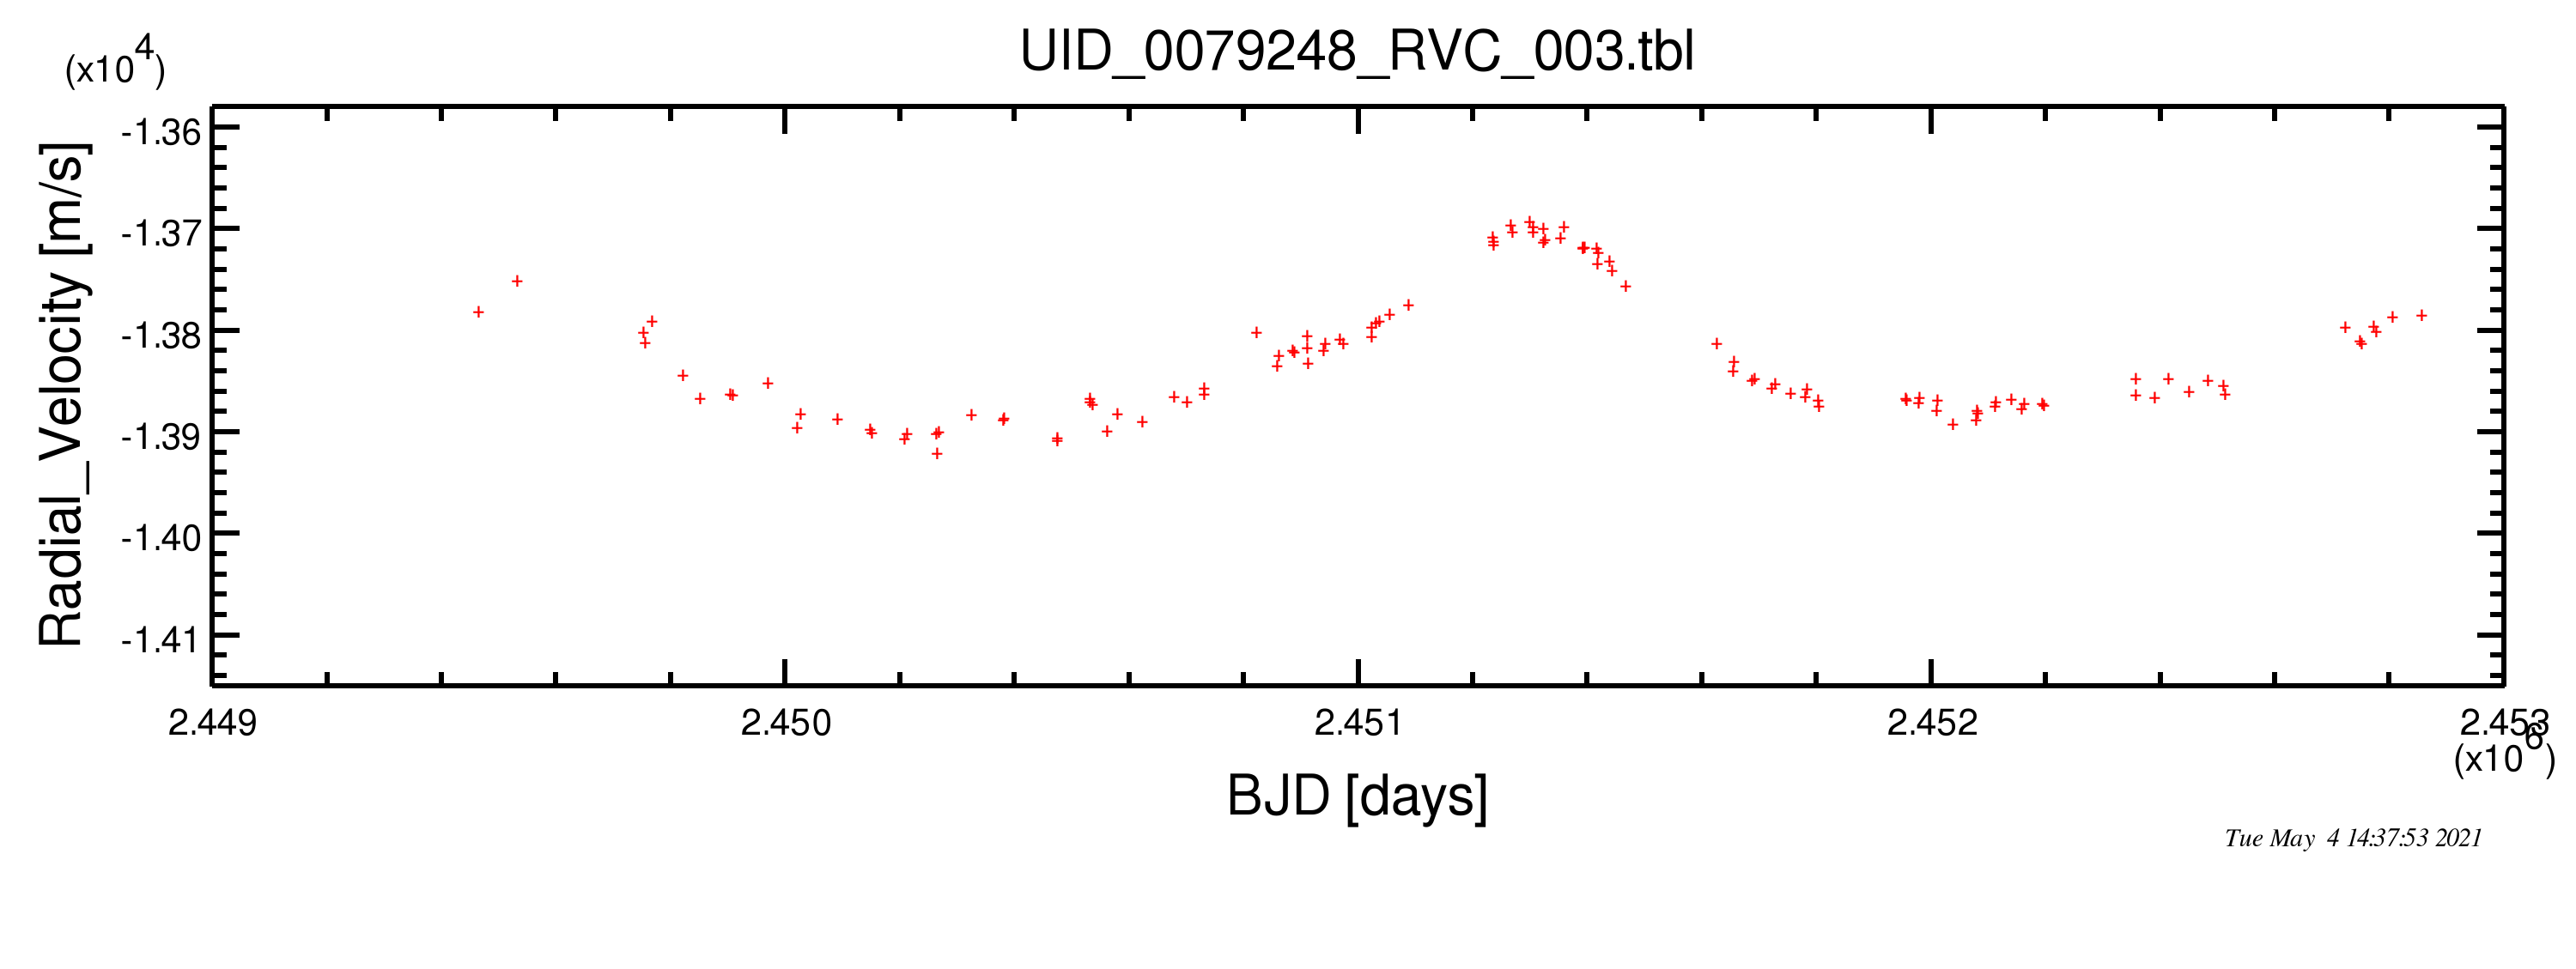

*Figure6: Radial Velocity Curve calculated and detected by ELODIE*

Discussing our eccentric and true anomaly, they seem to logically match the orbit of planet 14HerB. From the definition of true anomaly , true anomaly is an angular parameter that defines the position of a body moving along a Keplerian orbit. We have come to a derivation following suggestion from sources that writing it with a python import, e.g. $$ np.\arctan(\frac{\sqrt(1-e^2) \sin(E)}{1-e \cos(E)}) $$, is wrong and does not produce an accurate answer, as it does not avoid singularity. The derivation follows the link between eccentric anomaly and true anomaly: $$ sin(f) = \frac{\sqrt{1-e^2} \sin(E)}{1-e \cos(E)} $$, and
                                                                                   $$ cos(f) = \frac{\cos(E)-e}{1-e \cos(E)} $$
And afterwards we make a tan function out of this, and it makes it equal to:
   $$ tan(f) = \frac{\sqrt(1-e^2) \sin(E)}{\cos(E)-e} $$
A way to avoid singularity is to use the **math.atan2** library function, which takes two parameters for x and y. Hence our code would become function **f(t)** on cell 11.

Therefore from the definition of true anomaly and this derivation we come to another important equation, which is the distance equation, which is the distance between the focus of attraction and the orbiting body. This is an important equation as it links our observations from our graphs and link them to the changing distance, physically connecting true anomaly angle and the distance, r. It also uses the semi major axis, therefore again proving the physical importance of this equation:
$$ r = a\frac{1-e^2}{1-e\cos(f)}$$
This equation is also useful for a scenario for the same semi major axis a, but different eccentricity e.[3]

Looking at **figure3**, **figure4** and **figure5** we can connect where the radial velocity is positive and when at is negative and why it physically makes sense.

To get a sense of what is going on lets begin with pointing out what the blue and green dots are on *figure5*. Firstly the blue dot is called the perihilion, which is the point of closest approach in the orbit of planet 14HerB. And the green to is referred to as aphelion, which is the point which is the furthest from the focus.

If you take your attention to *figure3* and *figure4* we can see that we have positive radial velocity . And considering half a rotation is when the radial velocity is negative. But another question arises, why at some point on the graph radial velocity is zero? This can be answered by thinking about the change in direction, as radial velocity is a vector quantity, and hence radial acceleration would mathematically become zero, as it is also a right angle to velocity.

Another question is why the radial velocity is depicted as positive or negative? Firstly the radial velocity is positive when the bodies are moving away from us and negative if moving towards us. That is why in the radial velocity curve it is depicted that way. Also on *figure6* we can see that all the values are negative, hence the orbiting planet is constantly moving towards us, hence decreasing distance, therefore negative radial velocity.

Good point is that all our graphs for both radial velocity and the visualisation of the orbit in *figure5* have included an important orbital element, which is w, also called the argument of the periapsis. This is parametrically the angle from the body's ascending node to its periapsis, which is measured from in the direction of motion. Adding this to f(t) we get the longitude of the periapsis, hence that is why our graph's look a little bit tilted[2].

Realistically out of all the orbital elements we have just no included two elements to make it as realistic as possible, which are the inclination and the longitude of the ascending node. The inclination is the vertical tilt, but as our graphs are more 2d we can close our eyes and not include it. The longitude of the ascending node horizontally orients the ascending nodes of the ellipse, and is measured from a reference plane. This is usually done by knowing if our exoplanet's ascending or descending and also knowing if the inclination is zero or not.[5]

## Conclusion ##

The Newton-Raphson method has higher level of accuracy compared to the bisection algorithm as it converges quadratically, as the bisection algorithm converges linearly. As we have discovered in the the Newton-Raphson method also has its limitations, for example it can be fooled by local extrema, but hybrid algorithms or a deduction by empirical means or analytical observation can help the code and answers to be correct.

In order to reduce singularity we have used the math.atan2 library function which takes two parameters, as we have found out from reference[1] that an actual numpy inverse tan would not lead us to the correct answers and graphs.

The main points we have deducted from the graphs and calculations are that radial velocity graph is consistent with the distance graph and that we have included a very important point to all our graphs, which is (f(t)+w), the longitude of the periapsis, therefore tilting our graphs slightly.[2]

Looking at *figure5* we have noticed that the radial velocity changes its magnitude, this is conventionality as positive radial velocity means that the planet orbits away from us, hence increasing distance, and negative velocity means that the distance is decreasing, hence that is why on *figure6* all the values are negative.

Our code has been tested for different exoplanets, and again compared our radial velocity curve to the RV-curve of more sophisticated machines and it matches their graphs reasonably, therefore we can clearly state that we have a base code and understanding of the topic to a degree where we can employ it to visualise more exoplanet's behaviour around their stars.

In conclusion we can future improve the algorithm by making a hybrid from the bisection and Newton-Raphson method in order to not get fooled by local extrema, and also try to compare exoplanet's RV-curves and see how their double-systems differ.

## References ##

https://en.wikipedia.org/wiki/True_anomaly , True Anomaly Wikipedia [1]

https://en.wikipedia.org/wiki/Longitude_of_the_periapsis , Longitude of Periapsis [2]

https://arxiv.org/abs/1009.1738 , Keplerian Orbits and Dynamics by Exoplanets by Carl D. Murray and Alexandre C. M. Correia [3]

https://exoplanetarchive.ipac.caltech.edu/overview/14%20Her%20b?fbclid=IwAR0vJSmKvEAsyrKZdrNqmQKj_kSPKhoOCyJyd4-BwvfnB39uitDGBOZOZvs#planet_14-Her-b_collapsible , Information about planet 14HerB. [4]

https://en.wikipedia.org/wiki/Orbital_elements , Orbital Elements [5]

http://numerical.recipes/book/book.html , book by  William H. Press, Saul A. Teukolsky, William T. Vetterling and Brian P. Flannery. [6]
